# A first look at a neural network
Loading the MNIST dataset in Keras

In [3]:
import tensorflow

In [4]:
#MNIST 的例子中，樣本就是數字圖像
from tensorflow.keras.datasets import mnist #為了要辨識0-9的手寫數字集，keras模組有提供資料集，此處先載入他們
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images包含了我們要訓練的圖片，train_labels是標籤，標記了對應的train_images是哪個數字
#test_images、test_labels是最後用來驗證我們的模型使用，觀察一下資料集的大小。

In [5]:
train_images.shape#(60000, 28, 28) -> 60000張，每張像素是28x28

(60000, 28, 28)

In [6]:
len(train_labels)#對應的標籤當然就也是60000張

60000

In [7]:
train_labels#0~9的種類，共10種

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
train_labels[0]

5

In [8]:
test_images.shape# (10000, 28, 28) -> 10000張用來做為測試的圖像

(10000, 28, 28)

In [9]:
len(test_labels)#10000 -> 對應的標籤當然是10000

10000

In [10]:
test_labels#0~9的種類，共10種

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# The network architecture

In [12]:
#Sequential 可定義類神經網路中的圖層序列
#Dense 加上一層神經元 ; Relu 有效表示，如果 X 大於 0，則傳回 0，否則傳回 0。只會將 0 以上的值傳送到網路中的下一層。
#Softmax」採用一組值，因此可有效挑選出最大的值。例如，如果最後一個層的輸出看似像 [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]
#那後它可以避免您必須排序最大值——它返回 [0,0,0,0,1,0,0,0,0]。
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([#宣告順序層且建立模型
    layers.Dense(512, activation="relu"),#第一層layer，數字512代表有512個隱藏神經元（有512個輸出變數）（使用relu激勵函數）
    layers.Dense(10, activation="softmax")
    #在這邊代表第二層layer（最後一個Dense Layer）：輸出10個神經元，透過softmax activation(激勵函數)，轉成機率
    #即0-9的預測機率，選擇最大機率者為預測值。


])

2022-11-11 15:49:46.007198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# The compilation step

In [13]:
#編譯步驟
model.compile(optimizer="rmsprop",#確立目標及求解方法：以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Preparing the image data

In [14]:
#為了方便訓練我們把圖片從28乘28的二維圖形轉換成1維長784的向量，然後將0~255的圖片，縮到0~1的範圍
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

"Fitting" the model

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#使用model.fit進行訓練，train_images數字影像的特徵值，label數字影像真實的值。
#model.fit 執行時，您會看到損失以及準確度
#設定epoch(訓練週期)次數與每一批次比數 epoch=5：執行5次訓練週期 batch_size=128:每一批次128筆資料

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2606 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1047 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0702 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9887


Using the model to make predictions

In [19]:
#做實際預測
test_digits = test_images[0:10]
predictions = model.predict(test_digits)#輸入為test sample 輸出為label
predictions[0]

1/1 [==============================] - 0s 24ms/step


In [20]:
predictions[0]

array([1.0609823e-08, 2.3605842e-10, 2.9186999e-06, 1.3873537e-04,
       1.1476746e-12, 3.0293066e-09, 6.2616817e-15, 9.9985027e-01,
       3.8813713e-08, 7.9242445e-06], dtype=float32)

In [25]:
predictions[0].argmax()#取得預測答案


7

In [26]:
predictions[1].argmax()#取得預測答案

2

In [28]:
predictions[0][7]

0.9998503

In [29]:
test_labels[0]


7

In [30]:
test_labels[7]

9

Evaluating the model on new data

In [17]:
#模型評估
test_loss, test_acc = model.evaluate(test_images, test_labels)#model.evaluate()測試模型->會回報每組的loss(損失)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9761
test_acc: 0.9761000275611877


# Data representations for neural networks
Scalars (rank-0 tensors)


In [33]:
import numpy as np
x = np.array(12)
x

array(12)

In [34]:
x.ndim

0

# Vectors (rank-1 tensors)

In [35]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [36]:
x.ndim#維度

1

# Matrices (rank-2 tensors)

In [37]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

# Rank-3 and higher-rank tensors

In [23]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

Key attributes

In [40]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images.ndim#軸的個數

3

In [42]:
train_images.shape#形狀

(60000, 28, 28)

In [43]:
train_images.dtype#數據類型

dtype('uint8')

Displaying the fourth digit

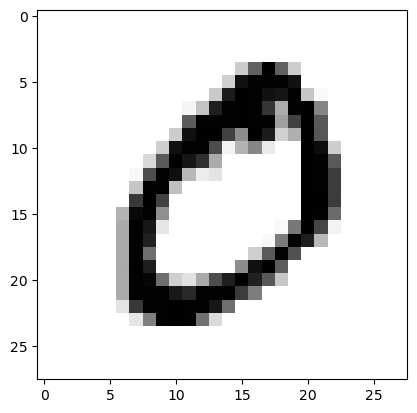

In [48]:
import matplotlib.pyplot as plt
digit = train_images[1]#數字可改，更改後圖片都會不一樣（顯示第一個數字）
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()#圖像顯示

In [49]:
train_labels[1]

0

# Manipulating tensors in NumPy

In [31]:
#操作向量
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [32]:
#也是操作向量
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [33]:
#也是操作向量
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [34]:
#一般來說，你可以沿著每個張量軸在任意兩個索引之間進行選擇。例如，你可以在所有圖像的右下角選出14 像素×14 像素的區域：
my_slice = train_images[:, 14:, 14:]

In [35]:
#也可以使用負數索引。與Python 列表中的負數索引類似，它表示與當前軸終點的相對位置。你可以在圖像中心裁剪出14 像素×14 像素的區域
my_slice = train_images[:, 7:-7, 7:-7]

# The notion of data batches

In [50]:
#具體來看，下面是MNIST 數據集的一個批量，批量大小為128。
batch = train_images[:128]#第一批

In [37]:
batch = train_images[128:256]#第二批

In [38]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]#第n批

# Real-world examples of data tensors
Vector data
Timeseries data or sequence data
Image data
Video data
The gears of neural networks: tensor operations
Element-wise operations

In [53]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()#x是一個Numpy的2D張量 避免覆蓋輸入張量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [54]:
#兩個矩陣的加法
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [55]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [56]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.72 s


In [59]:
import numpy as np
X = np.random.random((32, 10))#隨機
y = np.random.random((10,))
print(x)

[[0.75715623 0.82214662 0.38163813 ... 0.24577263 0.45597196 0.42909988]
 [0.86990414 0.14976975 0.01229364 ... 0.23956509 0.84647322 0.67256423]
 [0.9548692  0.75610319 0.8729036  ... 0.07269524 0.51763604 0.97720142]
 ...
 [0.86335734 0.64896802 0.49323533 ... 0.26772854 0.44730095 0.22775695]
 [0.97399949 0.72494377 0.73841372 ... 0.20963234 0.43077198 0.87339872]
 [0.87891104 0.03590429 0.8583106  ... 0.81755135 0.94231038 0.66580508]]


In [60]:
print(y)

[0.85479994 0.86300136 0.07206236 0.07696391 0.55462597 0.90204085
 0.32624849 0.9574974  0.05595674 0.63734409]


In [61]:
#np.expand_dims(arr, axis);arr：arr 為必填參數，為輸入數組。axis：要插入新軸的位置。
y = np.expand_dims(y, axis=0)
print(y)

[[0.85479994 0.86300136 0.07206236 0.07696391 0.55462597 0.90204085
  0.32624849 0.9574974  0.05595674 0.63734409]]


In [62]:
Y = np.concatenate([y] * 32, axis=0)#np.concatenate()合併陣列
print(y)

[[0.85479994 0.86300136 0.07206236 0.07696391 0.55462597 0.90204085
  0.32624849 0.9574974  0.05595674 0.63734409]]


In [63]:
def naive_add_matrix_and_vector(x, y):#矩陣和向量增加
    assert len(x.shape) == 2 #x是Numpy的2D張量
    assert len(y.shape) == 1 #y是一個Numpy的向量
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x


In [64]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)#np.maximum：(X, Y, out=None)X 與Y 逐位比較取其大者；最少接收兩個參數
print(z)

[[[[0.67128284 0.43549173 0.60057845 ... 0.91986013 0.82461148
    0.3523511 ]
   [0.57569954 0.61455119 0.9598142  ... 0.68837401 0.64894967
    0.57058817]
   [0.74684134 0.23826496 0.69303754 ... 0.85018038 0.86255839
    0.55659487]
   ...
   [0.93867571 0.84880558 0.52746462 ... 0.99900876 0.93454992
    0.40048526]
   [0.84813525 0.63099565 0.40838229 ... 0.75297494 0.47507855
    0.83022115]
   [0.01201309 0.25043211 0.85819515 ... 0.91121127 0.92659656
    0.82632233]]

  [[0.94495261 0.42912152 0.60057845 ... 0.91986013 0.82705327
    0.75663132]
   [0.70021455 0.36247765 0.44434986 ... 0.68837401 0.46331493
    0.99773246]
   [0.46655263 0.35470498 0.42213779 ... 0.71624667 0.87545541
    0.55659487]
   ...
   [0.93867571 0.48775851 0.40621687 ... 0.99900876 0.74135878
    0.1123122 ]
   [0.84813525 0.85039015 0.50802574 ... 0.75297494 0.9581098
    0.3600414 ]
   [0.90579115 0.31725721 0.70107587 ... 0.51179637 0.92659656
    0.82632233]]

  [[0.67128284 0.90572378 0.6005784

# Tensor product

In [79]:
x = np.random.random((5,))#隨機產生1*5矩陣大小ㄉ的0-1浮點數
print(x)
y = np.random.random((5,))
print(y)
z = np.dot(x, y)#矩陣向量內積
print(z)

[0.6944645  0.2648463  0.3036786  0.00957724 0.4020037 ]
[0.2830396  0.65761976 0.99135812 0.91244212 0.55879331]
0.9051590140413859


In [49]:
def naive_vector_dot(x, y):#向量內積函式（x,y是向量）
    assert len(x.shape) == 1#兩個向量之間的點積是一個標量，而且只有元素個數相同的向量之間才能做點積
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [50]:
def naive_matrix_vector_dot(x, y):#可以對一個矩陣x 和一個向量y 做點積，返回值是一個向量，其中每個元素是y 和x 的每一行之間的點積
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [51]:
def naive_matrix_vector_dot(x, y):#零矩陣
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [52]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# Tensor reshaping

In [90]:
train_images = train_images.reshape((60000, 28 * 28))

In [80]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [81]:
x = x.reshape((6, 1))#讓張量排列方式改變而已
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [78]:
x = np.zeros((300, 20))
x = np.transpose(x)#轉置矩陣
x.shape

(20, 300)

In [80]:
import tensorflow as tf
x = tf.Variable(0.)
#with tf.GradientTape() as tape: 其內部發生的tensor操作都會被記錄下來，
#可以在其外部通過tape.gradient(y, x)方法獲取因變量y相對於自變量x的梯度。其中自變量可以是單個variable,
#也可以是一個variable的列表，variable可以是scalar, 也可以是高維張量.
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x )

tf.Tensor(2.0, shape=(), dtype=float32)


In [58]:
x = tf.Variable(tf.random.uniform((2, 2)))#均勻分佈抽樣得到形狀（2,2）的矩陣
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [59]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))#x是tensor非variable
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])#[y對w的導數,y對b的導數]

In [60]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [61]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [62]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2556 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1022 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0376 - accuracy: 0.9890


In [64]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [65]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [66]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [67]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [68]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [69]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [70]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [71]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [72]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 7.00
loss at batch 100: 2.24
loss at batch 200: 2.25
loss at batch 300: 2.09
loss at batch 400: 2.25
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.87
loss at batch 200: 1.86
loss at batch 300: 1.72
loss at batch 400: 1.85
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.57
loss at batch 200: 1.52
loss at batch 300: 1.41
loss at batch 400: 1.52
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.32
loss at batch 200: 1.25
loss at batch 300: 1.19
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.13
loss at batch 200: 1.05
loss at batch 300: 1.03
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 0.99
loss at batch 200: 0.91
loss at batch 300: 0.91
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.89
loss at batch 200: 0.80
loss at batch 300: 0.82
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.80
loss at batch 200: 0.73
loss at batch 300: 0.75
loss at batch 40

In [73]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82
